In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()
tips = pd.read_csv("https://milliams.com/courses/data_analysis_python/tips.csv")
tips.head()

,total_bill,tip,day,time,size
0,16.99,0.71,Sun,Dinner,2
1,10.34,1.16,Sun,Dinner,3
2,21.01,2.45,Sun,Dinner,3
3,23.68,2.32,Sun,Dinner,2
4,24.59,2.53,Sun,Dinner,4


In [2]:
tips[["total_bill", "tip"]].head()

,total_bill,tip
0,16.99,0.71
1,10.34,1.16
2,21.01,2.45
3,23.68,2.32
4,24.59,2.53


In [3]:
tips.loc[2, "total_bill"]

21.01

In [4]:
tips["total_bill"].sum()
tips["total_bill"].mean()
tips["total_bill"].max()
tips["total_bill"].idxmax()

170

## Adding new columns

In [5]:
tips["percent_tip"] = (tips["tip"] / tips["total_bill"])*100
tips

,total_bill,tip,day,time,size,percent_tip
0,16.99,0.71,Sun,Dinner,2,4.178929
1,10.34,1.16,Sun,Dinner,3,11.218569
2,21.01,2.45,Sun,Dinner,3,11.661114
3,23.68,2.32,Sun,Dinner,2,9.797297
4,24.59,2.53,Sun,Dinner,4,10.288735
...,...,...,...,...,...,...
239,29.03,4.14,Sat,Dinner,3,14.261109
240,27.18,1.40,Sat,Dinner,2,5.150846
241,22.67,1.40,Sat,Dinner,2,6.175562
242,17.82,1.22,Sat,Dinner,2,6.846240


In [6]:
tips["day"] == "Sat"

0      False
1      False
2      False
3      False
4      False
       ...  
239     True
240     True
241     True
242     True
243    False
Name: day, Length: 244, dtype: bool

In [7]:
tips[tips["day"] == "Sat"].head()

,total_bill,tip,day,time,size,percent_tip
19,20.65,2.34,Sat,Dinner,3,11.331719
20,17.92,2.86,Sat,Dinner,2,15.959821
21,20.29,1.92,Sat,Dinner,2,9.462790
22,15.77,1.56,Sat,Dinner,2,9.892200
23,39.42,5.31,Sat,Dinner,4,13.470320


In [8]:
sat_tips = tips[tips["day"] == "Sat"]  # First grab the Saturday data and save it as a variable
sat_tips[sat_tips["total_bill"] < 8]  # Then act on the new DataFrame as use it as before

,total_bill,tip,day,time,size,percent_tip
67,3.07,0.70,Sat,Dinner,1,22.801303
111,7.25,0.70,Sat,Dinner,1,9.655172
218,7.74,1.01,Sat,Dinner,2,13.049096


In [9]:
tips[(tips["day"] == "Sat") & (tips["total_bill"] < 8)]

,total_bill,tip,day,time,size,percent_tip
67,3.07,0.70,Sat,Dinner,1,22.801303
111,7.25,0.70,Sat,Dinner,1,9.655172
218,7.74,1.01,Sat,Dinner,2,13.049096


## Seaborn

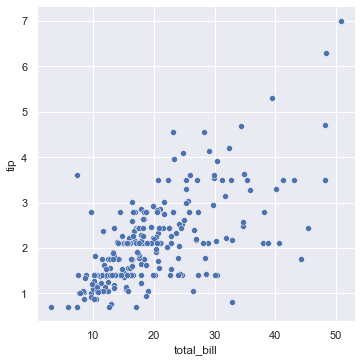

In [10]:
sns.relplot(data=tips, x="total_bill", y="tip")

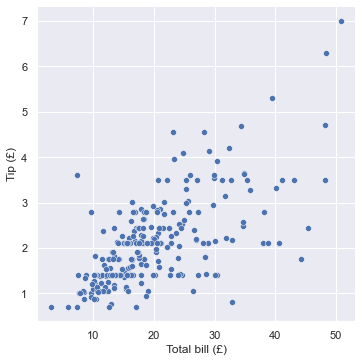

In [11]:
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.set_axis_labels("Total bill (£)", "Tip (£)")

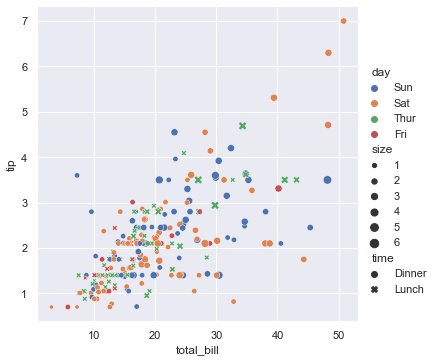

In [12]:
sns.relplot(data=tips, x="total_bill", y="tip", 
            hue="day", size="size", style="time")

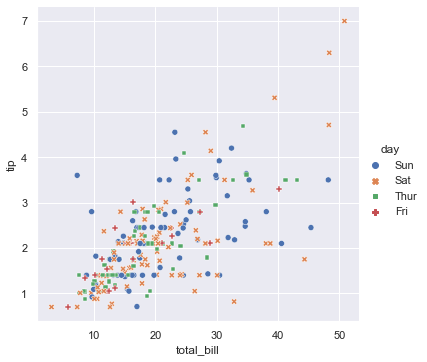

In [13]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", style="day")

### Plotting distributions

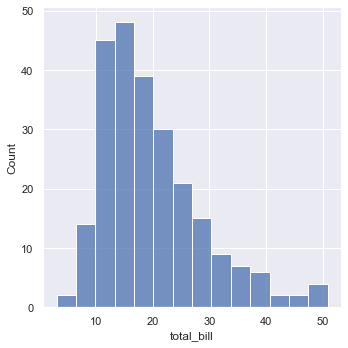

In [14]:
sns.displot(data=tips, x="total_bill")

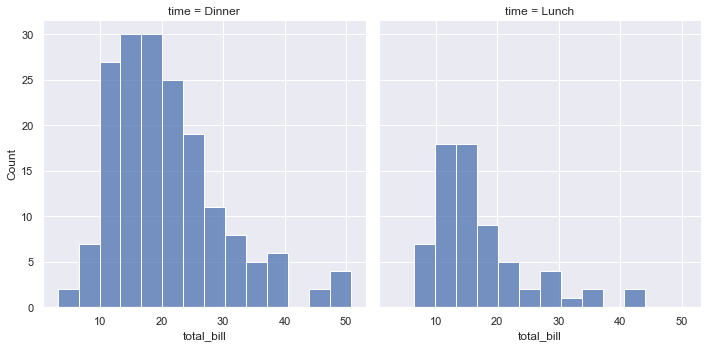

In [15]:
sns.displot(data=tips, x="total_bill", col="time")

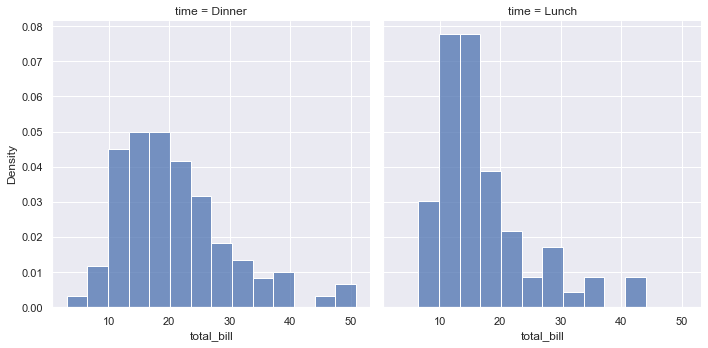

In [16]:
sns.displot(data=tips, x="total_bill", 
            col="time", stat="density", 
            common_norm=False)

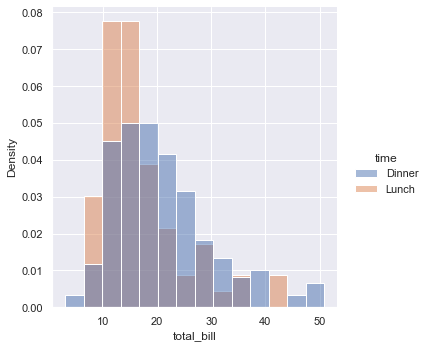

In [17]:
sns.displot(data=tips, x="total_bill", hue="time", 
            stat="density", common_norm=False)

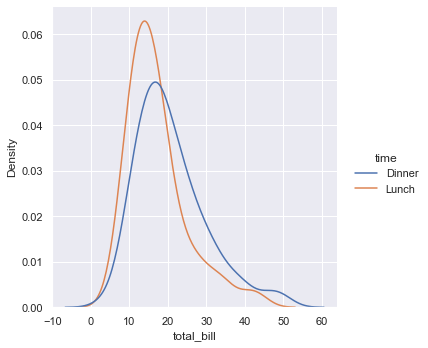

In [18]:
sns.displot(data=tips, x="total_bill", 
            hue="time", kind="kde", common_norm=False)

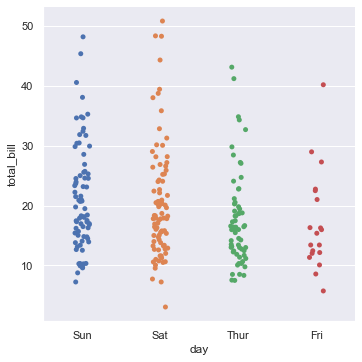

In [19]:
sns.catplot(data=tips, 
            x="day", 
            y="total_bill")

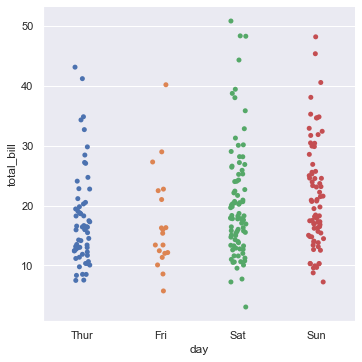

In [20]:
sns.catplot(data=tips, x="day", y="total_bill", 
            order=["Thur", "Fri", "Sat", "Sun"])

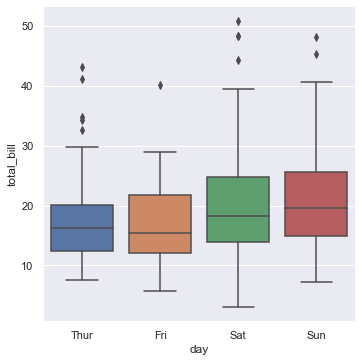

In [21]:
sns.catplot(data=tips, x="day", y="total_bill", 
            order=["Thur", "Fri", "Sat", "Sun"], 
            kind="box")

## sns.load_dataset("tips")

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


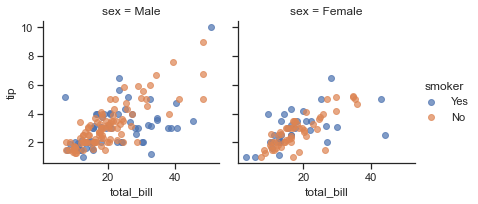

In [23]:
g=sns.FacetGrid(tips,col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()
plt.show()

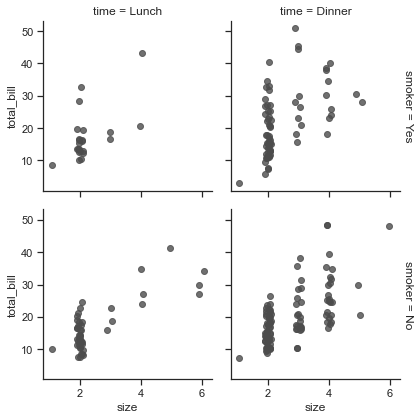

In [24]:
g=sns.FacetGrid(tips,row="smoker", col="time",margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color =".3",fit_reg=False, x_jitter=.1)
plt.show()

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


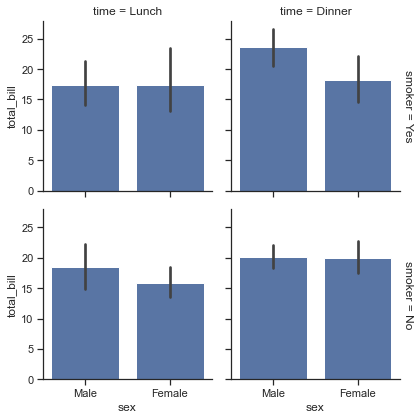

In [25]:
g=sns.FacetGrid(tips,row="smoker", col="time",margin_titles=True)
g.map(sns.barplot, "sex", "total_bill")
plt.show()

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\cti110016\Anacond

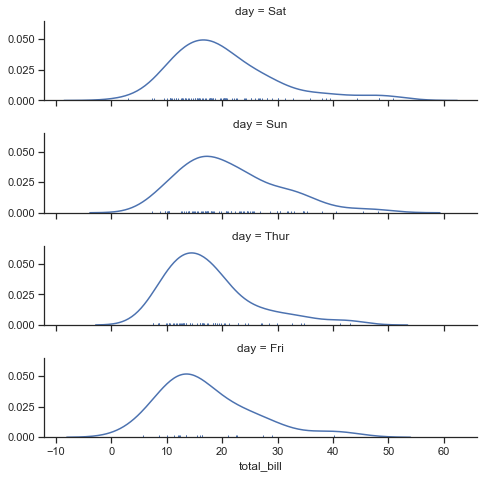

In [26]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day",row_order=ordered_days,height=1.7,aspect=4)
g.map(sns.distplot,"total_bill",hist=False,rug=True)
plt.show()

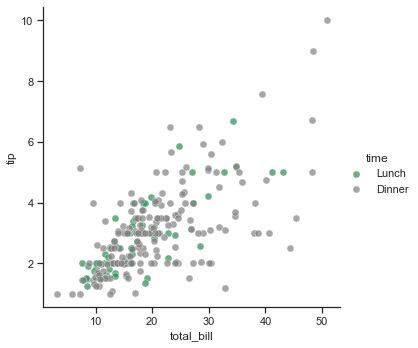

In [27]:
pal = dict(Lunch="seagreen",Dinner="gray")
g = sns.FacetGrid(tips, hue="time",palette=pal,height=5)
g.map(plt.scatter,"total_bill","tip",s=50,alpha=.7,linewidth=.5,edgecolor="white")      
g.add_legend()
plt.show()

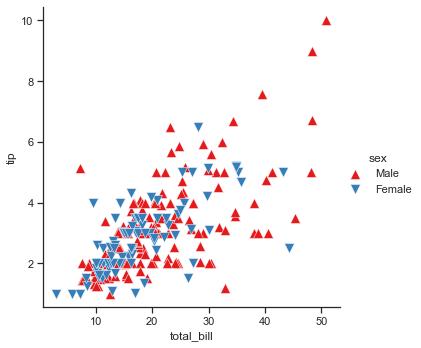

In [28]:
g = sns.FacetGrid(tips, hue="sex",palette="Set1",height=5,hue_kws={"marker":["^","v"]})
g.map(plt.scatter,"total_bill","tip",s=100,linewidth=.5,edgecolor="white")      
g.add_legend()
plt.show()

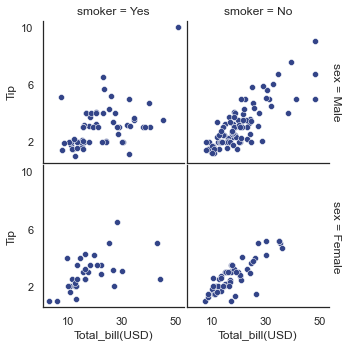

In [29]:
with sns.axes_style("white"):
    g=sns.FacetGrid(tips,row="sex",col="smoker",margin_titles=True,height=2.5)

g.map(plt.scatter,"total_bill","tip",color="#334488",edgecolor="white",lw=.5)
g.set_axis_labels("Total_bill(USD)","Tip")
g.set(xticks=[10,30,50],yticks=[2,6,10])
g.fig.subplots_adjust(wspace=.02,hspace=.02)
plt.show()

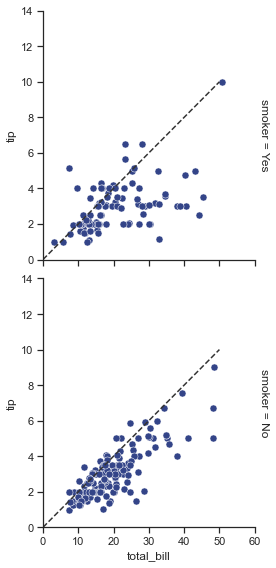

In [30]:
g=sns.FacetGrid(tips,row="smoker",margin_titles=True,height=4)

g.map(plt.scatter,"total_bill","tip",color="#334488",edgecolor="white",s=50,lw=.5)

for ax in g.axes.flat:
    ax.plot((0,50),(0,.2*50),c=".2",ls="--")

g.set(xlim=(0,60),ylim=(0,14))
plt.show()

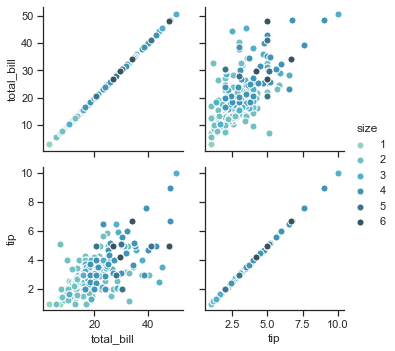

In [31]:
g=sns.PairGrid(tips,hue="size",palette="GnBu_d")
g.map(plt.scatter,s=50,edgecolor="white")
g.add_legend()
plt.show()